<center>
    <h1><font size="16">Especialización en Estadística</font></h1>
    <h1><font size="12">SERIES DE TIEMPO</font></h1>
</center>

<h2>🧪 Taller práctico: Métodos de Suavizamiento y Regresión</h2>

<h3>🎯 Objetivo</h3>

Aplicar modelos de suavizamiento (Holt-Winters) y regresión lineal sobre una serie temporal real, evaluando su ajuste, pronóstico y validez.

**📦 Dataset sugerido**

- `AirPassengers` (disponible por defecto)
- O una serie personalizada que contenga tendencia y estacionalidad clara (ventas mensuales, consumo eléctrico, visitantes, etc.).

---

<h3>🧭 Actividades</h3>

🔹 **1. Exploración inicial**

1.1. Carga la serie y conviértela a un objeto `tsibble`  
1.2. Visualiza la serie original y describe brevemente su comportamiento


In [1]:
# librerías necesarias
library(forecast)
library(ggplot2)
library(fpp3)
library(yardstick)
library(dplyr)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────── fpp3 1.0.1 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.6
✔ dplyr       1.1.4     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.1     ✔ feasts      0.4.1
✔ lubridate   1.9.4     ✔ fable       0.4.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()


Adjuntando el paquete: 'yardstick'


The following object is

Plot variable not specified, automatically selected `.vars = value`


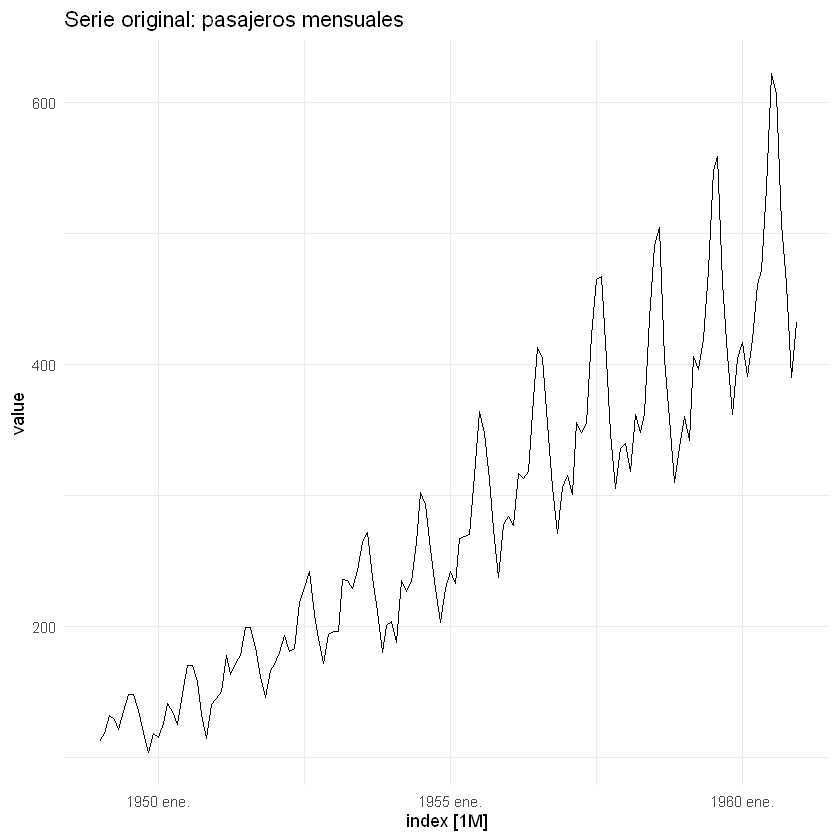

In [2]:
ap <- as_tsibble(AirPassengers)

autoplot(ap) +
  ggtitle("Serie original: pasajeros mensuales") +
  theme_minimal()


🔹 **2. Suavizamiento con Holt-Winters**

2.1. Ajusta dos modelos Holt-Winters:

- Uno con componente **aditiva**
- Otro con componente **multiplicativa**

2.2. Compara los pronósticos a 12 pasos vista


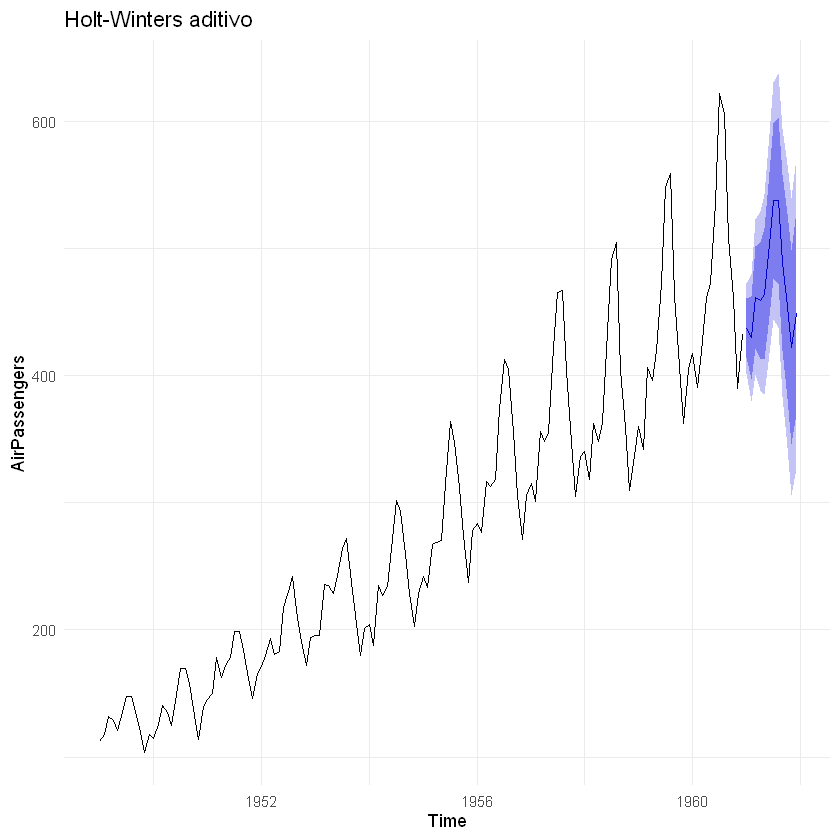

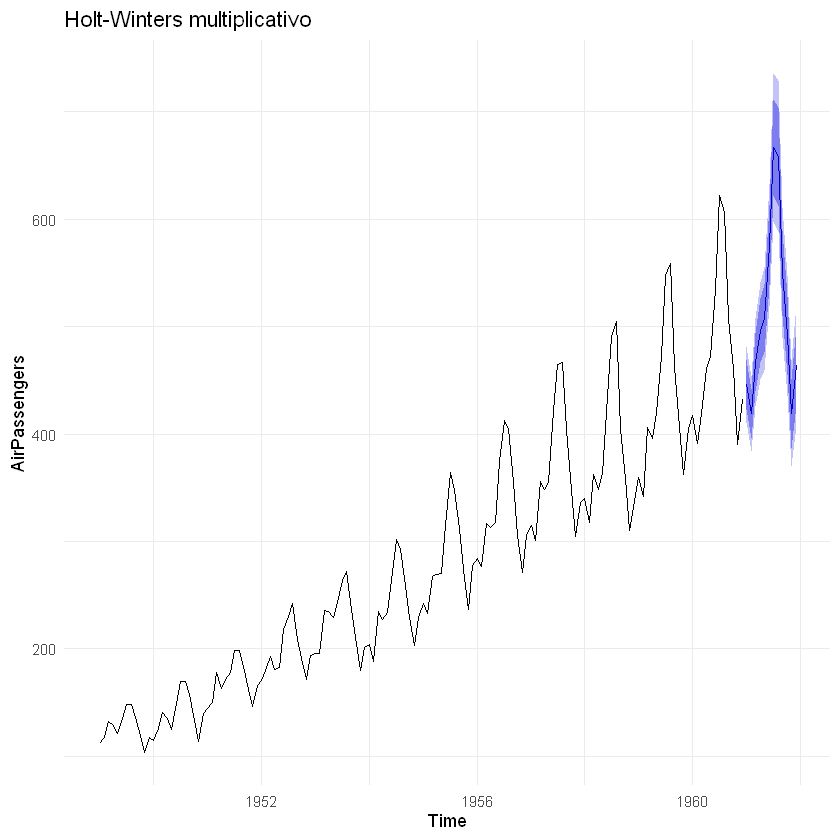

In [3]:
modelo_hw_add <- hw(AirPassengers, seasonal = "additive", h = 12)
modelo_hw_mult <- hw(AirPassengers, seasonal = "multiplicative", h = 12)

autoplot(modelo_hw_add) + ggtitle("Holt-Winters aditivo") + theme_minimal()
autoplot(modelo_hw_mult) + ggtitle("Holt-Winters multiplicativo") + theme_minimal()


2.3. ¿Cuál se ajusta mejor a la dinámica observada?

---

🔹 **3. Regresión lineal simple y múltiple**

3.1. Crea una variable de tendencia:


In [4]:
ap <- ap %>%
  mutate(t = row_number())


3.2. Ajusta un modelo de regresión lineal simple:  
$$
Y_t = \beta_0 + \beta_1 t + \varepsilon_t
$$

3.3. Ajusta un modelo múltiple con estacionalidad:

In [5]:
modelo_rlm <- ap %>%
  model(RLM = TSLM(value ~ t + season()))

report(modelo_rlm)

Series: value 
Model: TSLM 

Residuals:
    Min      1Q  Median      3Q     Max 
-42.121 -18.564  -3.268  15.189  95.085 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     63.50794    8.38856   7.571 5.88e-12 ***
t                2.66033    0.05297  50.225  < 2e-16 ***
season()year2   -9.41033   10.74941  -0.875 0.382944    
season()year3   23.09601   10.74980   2.149 0.033513 *  
season()year4   17.35235   10.75046   1.614 0.108911    
season()year5   19.44202   10.75137   1.808 0.072849 .  
season()year6   56.61502   10.75254   5.265 5.58e-07 ***
season()year7   93.62136   10.75398   8.706 1.17e-14 ***
season()year8   90.71103   10.75567   8.434 5.32e-14 ***
season()year9   39.38403   10.75763   3.661 0.000363 ***
season()year10   0.89037   10.75985   0.083 0.934177    
season()year11 -35.51996   10.76232  -3.300 0.001244 ** 
season()year12  -9.18029   10.76506  -0.853 0.395335    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 

3.4. Genera el `new_data()` y calcula el pronóstico

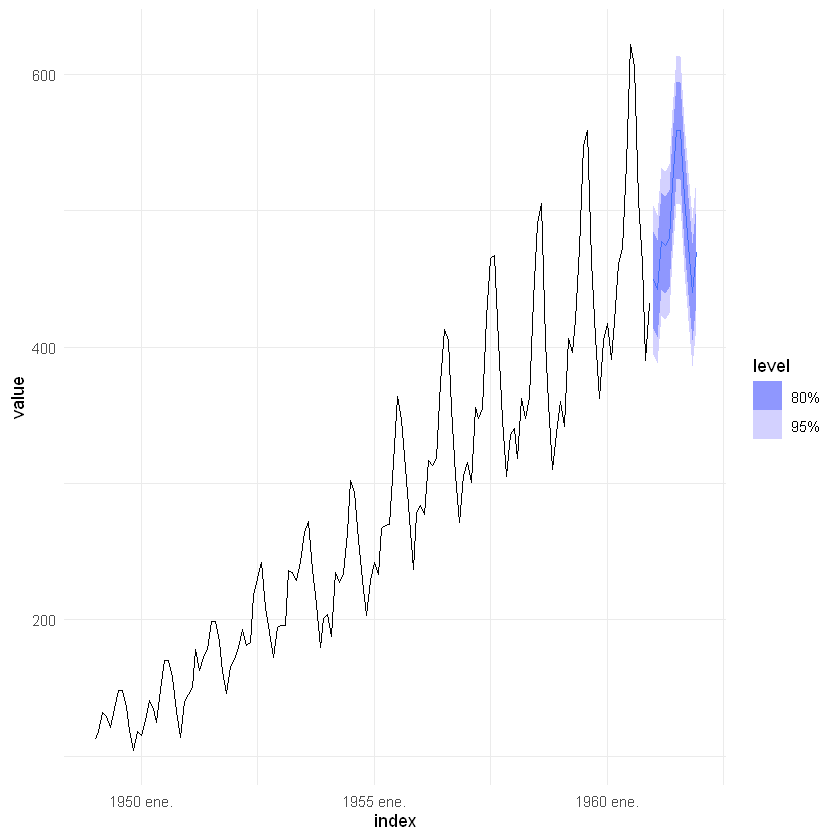

In [6]:
new_data <- ap %>%
  new_data(n = 12) %>%
  mutate(t = max(ap$t) + 1:12)

forecast(modelo_rlm, new_data = new_data) %>%
  autoplot(ap) +
  theme_minimal()


🔹 **4. Análisis de residuos**

4.1. Visualiza residuos del modelo RLM:


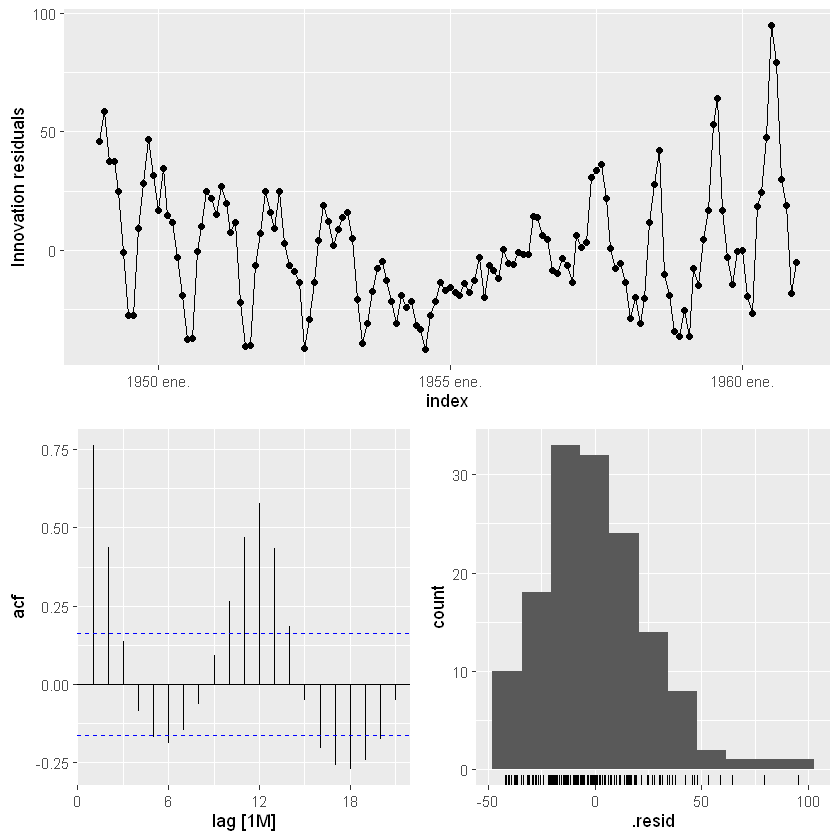

In [7]:
modelo_rlm %>% gg_tsresiduals()

4.2. Comenta si los residuos parecen ruido blanco, o si hay evidencia de autocorrelación o patrón estacional no capturado.

---

🔹 **5. Comparación final**

5.1. Calcula las métricas de precisión (`accuracy()`) para Holt-Winters aditivo, multiplicativo y el modelo RLM (si es posible).


In [19]:
# library(forecast)

forecast::accuracy(modelo_hw_add) %>% t() %>% print()
forecast::accuracy(modelo_hw_mult) %>% t() %>% print()

     Training set
ME      0.9638247
RMSE   17.0149487
MAE    12.8120283
MPE     0.3539818
MAPE    5.2247148
MASE    0.3999971
ACF1    0.1875311
     Training set
ME      1.2569731
RMSE   10.6325578
MAE     7.7906492
MPE     0.2182707
MAPE    2.9144110
MASE    0.2432275
ACF1    0.2135914


In [9]:
# library(yardstick)
# library(dplyr)

# Obtener valores ajustados
ajuste_rlm <- augment(modelo_rlm)

# Calcular métricas comparando truth y estimate
ajuste_rlm %>%
  metrics(truth = value, estimate = .fitted) %>%
  print()


# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard      25.1  
2 rsq     standard       0.956
3 mae     standard      19.8  


In [21]:
# Obtener accuracy() para modelos Holt-Winters
acc_hw_add <- forecast::accuracy(modelo_hw_add) %>%
  as_tibble(rownames = "Conjunto") %>%
  filter(Conjunto == "Training set") %>%
  transmute(
    Modelo = "Holt-Winters Aditivo",
    RMSE = RMSE,
    MAE = MAE,
    MAPE = MAPE,
    ACF1 = ACF1,
    R2 = NA_real_
  )

acc_hw_mult <- forecast::accuracy(modelo_hw_mult) %>%
  as_tibble(rownames = "Conjunto") %>%
  filter(Conjunto == "Training set") %>%
  transmute(
    Modelo = "Holt-Winters Multiplicativo",
    RMSE = RMSE,
    MAE = MAE,
    MAPE = MAPE,
    ACF1 = ACF1,
    R2 = NA_real_
  )

# Obtener métricas del modelo de regresión (ajuste en muestra)
acc_rlm <- ajuste_rlm %>%
  metrics(truth = value, estimate = .fitted) %>%
  select(.metric, .estimate) %>%
  pivot_wider(names_from = .metric, values_from = .estimate) %>%
  transmute(
    Modelo = "Regresión Lineal (TSLM)",
    RMSE = rmse,
    MAE = mae,
    MAPE = NA_real_,
    ACF1 = NA_real_,
    R2 = rsq
  )

# Unir todo en una tabla comparativa
tabla_modelos <- bind_rows(acc_hw_add, acc_hw_mult, acc_rlm)

# Mostrar
print(tabla_modelos)


# A tibble: 3 × 6
  Modelo                       RMSE   MAE  MAPE   ACF1     R2
  <chr>                       <dbl> <dbl> <dbl>  <dbl>  <dbl>
1 Holt-Winters Aditivo         17.0 12.8   5.22  0.188 NA    
2 Holt-Winters Multiplicativo  10.6  7.79  2.91  0.214 NA    
3 Regresión Lineal (TSLM)      25.1 19.8  NA    NA      0.956


5.2. ¿Cuál modelo resulta más adecuado para esta serie?

---

<h3>🧠 Preguntas de reflexión</h3>

- ¿Cómo influye la elección aditiva vs multiplicativa en la calidad del pronóstico?
- ¿Qué ventajas aporta un modelo de regresión frente a uno puramente estructural como Holt-Winters?
- ¿Qué harías si los residuos presentan estacionalidad no explicada?
